<font size = "5"> **Chapter 2: [Introduction](../index.md/CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Homework 2

<font size = "5"> Changing Illumination</font>

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework02.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Homework/Homework02.ipynb)
    
part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2025
<br>
Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load Packages

First we need to load the libraries we want to use. 
Here we use:
- numpy: numerical library
- matplotlib: graphic library
- pyTEMlib: TEM microsocpy library

All of those packages except pyTEMlib are provided by annaconda.
### Check Installed Packages

In [15]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2025.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

installing pyTEMlib
done


### Load the plotting and pyTEMlib packages

Note: 

On Google colab you might have to restart the session in Menu: Runtime-Restart Session (Crtl-M) !

In [13]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    
import pyTEMlib.animation as animate

## Change Illumination on sample

Below is a stack of lenses that is equivalent to the condenser lens system on the Spectra 300.

The objective lens focal length is usually not changed (at least not much), and the sample is in the middle of the objective lens system.

Change the ``focal lengths`` parameters so that there the illumination changes from parallel to convergent. 

Tip: do not change the gun (first value), and the objective (last two values) values.


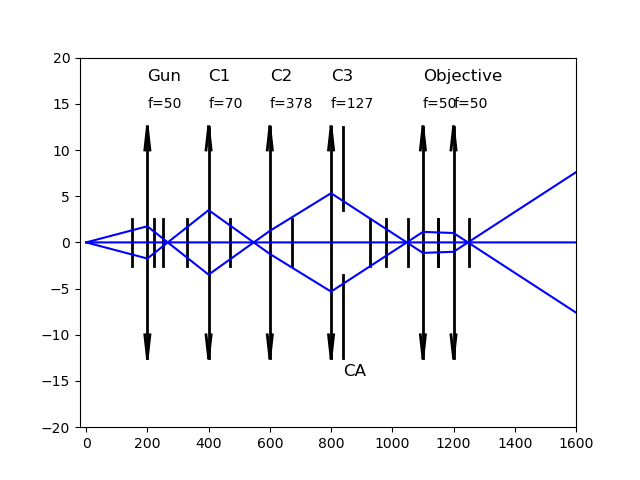

In [14]:
# ------ INPUT ------#
focal_lengths = np.array([50.0, 70.0,  378.0,  127.0 ,  50,  50]) # Slightly convergent

#                         Gun,  C1,   C2,      C3,   objective lens
#--------------------#

# Define lenses here
lens_labels =             ['Gun', 'C1', 'C2', 'C3' , 'Objective', '']
lens_positions = np.array([200.0, 400.0, 600.0, 800.0, 1100,1200    ]) # lens positions


animate.propagate_beam([0,],1,  3, lens_positions, focal_lengths, lens_labels,   'blue')


## Questions

- Does your beam stay close to the optic axis?
- Could you reach a convergent beam byonly changing one lens?
- What is the convergence angle?